In [46]:
import pandas as pa 
    
ff = pa.read_csv("datapoints.txt") #läs datan från "datapoints.txt" filen som är formaterat som csv.
ff.columns = ff.columns.str.replace("(", "").str.replace(")", "") #Rensa parenteser från kolumnnen.
ff.columns = ff.columns.str.strip().str.replace(" ", "_") # i slutet och början av kolummnen ta bort blanksteg.
ff["Pichu-0_pikachu-1"] = ff["label_0-pichu"]
ff = ff.drop(["label_0-pichu", "1-pikachu"], axis = 1) #från DataFrame ta bort specifika kolumner.
ff.columns = ff.columns.str.capitalize()
ff.columns

Index(['Width_cm', 'Height_cm', 'Pichu-0_pikachu-1'], dtype='object')

In [40]:
zero_value = ff[ff['Pichu-0_pikachu-1']==0] #Filtrera och skapa DataFrame där kolumnnen är lika med 0
one_value = ff[ff['Pichu-0_pikachu-1']==1]


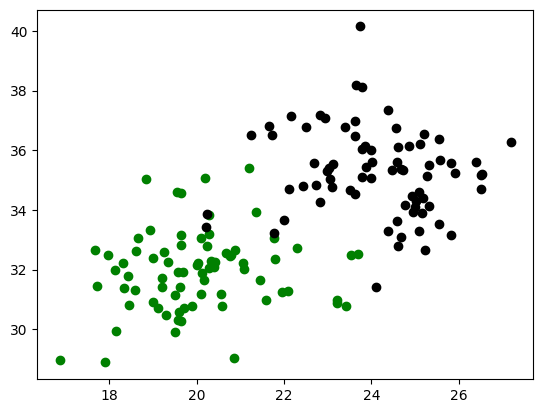

In [41]:
import matplotlib.pyplot as plt

plt.scatter(x = zero_value["Width_cm"], y = zero_value["Height_cm"], color = "green") #Skapa ett spridningsdiagram med funktionen plt.scatter.
plt.scatter(x = one_value["Width_cm"], y = one_value["Height_cm"], color = "black")
plt.show()

In [42]:
import pandas as pd
test_list = []
with open("testpoints.txt", "r") as test_file: #Öppna filen i läsläge och tilldela den till variabeln "test_file"
  fil = test_file.readlines() # Läs alla rader från filen 'test_file'.
  for line in fil:
    test_list.append(line)

test_data = pd.DataFrame(test_list, columns = ["test_d"]) #skapa en Pandas DataFrame.
test_data = test_data.drop(0, axis = 0) #från DataFrameta ta bort den randen som har index 0.
test_data ["width_cm"] = test_data["test_d"].str.split("(").str.get(1).str.split(",").str.get(0) #Skapa en kolumn genom att manipulera stränger i kolumnen.
test_data ["Height_cm"] = test_data["test_d"].str.split(")").str.get(0).str.split(",").str.get(1)
test_data = test_data.drop("test_d", axis = 1) #Ta bort den raden som har index 1 i DataFrame.
test_data[["width_cm", "Height_cm"]] = test_data[["width_cm", "Height_cm"]].astype(float) #Konvertera värden till flyttal i kolumnerna i DataFrame.
test_data

,width_cm,Height_cm
1,25.0,32.0
2,24.2,31.5
3,22.0,34.0
4,20.5,34.0


In [43]:
import numpy as np

def pich_pika(wid, hie): #Funktionen definierer och tar emot två parametrar.
    liss = []
    for x , y in zip(ff["Width_cm"], ff["Height_cm"]): #Loopar över varje par värden i kolumnerna.
        liss.append(np.sqrt(np.power(x - wid, 2) + np.power(y-hie, 2))) # med hjälp av Pythagoras sats beräknar avståndet mellan punkt (X, y)och (wide, hie)
    minsta_lis = min(liss) #Beräknar den minsta värdet från listan
    lis_rad = liss.index(minsta_lis) # I listan hittar indexet för det minsta värdet.
    result = ff.loc[lis_rad, "Pichu-0_pikachu-1"] #Hämtar värdet från DataFrame
    if  result == 1:
        return "Pikachu"
    else:
        return "Pichu"

for x, y in zip(test_data["width_cm"], test_data["Height_cm"]):
    de = pich_pika(x, y)
    print(f"({x},{y}): classified as {de}") #Skriver ut en formaterad sträng som visar koordinator.

(25.0,32.0): classified as Pikachu
(24.2,31.5): classified as Pikachu
(22.0,34.0): classified as Pikachu
(20.5,34.0): classified as Pichu


In [44]:
def pich_pikacho(wid, hie):
    lis = []
    for x , y in zip(ff["Width_cm"], ff["Height_cm"]): #Loopar över varje par värden i kolumnerna.
        lis.append(np.sqrt(np.power(x- wid, 2)+ np.power(y-hie, 2)))
    sort_all_point = sorted(lis) #med hjälp av Pythagoras sats beräknar avståndet mellan punkterna.
    find_ten_point = sort_all_point[:10]
    index_point = [lis.index(x) for x in find_ten_point]
    result = ff.loc[index_point, "Pichu-0_pikachu-1"] #Hämtar värdet från DataFrame.
    if  sum(result)> 5:
        return "Pikachu"
    else:
        return "Pichu"
        
print(pich_pikacho(34, 45))

Pikachu


In [45]:
while True: 
    try:
       user_info = input("Please enter your first number") #Ber anändaren att skriva in första numret.
       user_info1 = input("Please enter your second number")
       user_info = user_info.replace(",", ".") #Ersätter kommatecken i strängen.
       user_info1 = user_info1.replace(",", ".")

       de = float(user_info) #Strängen konverteras till flyttal
       ve = float(user_info1)
       if de < 0 or ve < 0:
           print("You have insered a negative value")
       else:
           print(pich_pikacho(de, ve))
           print(pich_pika(de, ve))
           break
    except ValueError: #Om användaren skriver in fel format och får "ValueError"
        print("You have insered a wrong value")

Pikachu
Pikachu
